# ***Important Libraries***

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt

# ***Creating Dataset***

In [2]:
data_size = 15000

train_per = 0.95 # 95% of the data is for training.

train_size = int(data_size * train_per)

x = np.linspace(-10,10, data_size) #line_space is used to return data_size number of evenly spaced numbers over the interval [-1,1]
x = x/x.max()
np.random.shuffle(x) #To shuffle the contents

# Generate the output data using equation y =5*x**3+2*x**2+6*x+8 + noise
y = 5 * x **3 + 2 * x **2 + 6 * x + 8 + np.random.normal(0, 0.05, (data_size, )) #Draw random samples -> 0 - centre, 0.05 - standard deviation ,(data_size, ) - output shape

# Split into test and train pairs

x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

In [3]:
len(x_train)

14250

In [4]:
x.max()

1.0

# ***Fitting the Model***

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3,activation='tanh'),
    tf.keras.layers.Dense(1),
])


In [6]:
epochs = 150
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.0
sgd = SGD(lr=learning_rate, momentum=momentum, decay=0.0)
model.compile(loss='mse', optimizer=sgd,)
# Fit the model
training_history=model.fit(x_train,
                  y_train,
                  epochs=epochs, 
                  batch_size=train_size,
                  verbose=1,
                  validation_data=(x_test, y_test),
)
print("Average test loss: ", training_history.history['loss'][-1])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
1/1 [==============================] - 1s 723ms/step - loss: 110.2614 - val_loss: 62.9541
Epoch 2/150
1/1 [==============================] - 0s 24ms/step - loss: 62.7489 - val_loss: 33.2716
Epoch 3/150
1/1 [==============================] - 0s 26ms/step - loss: 33.3167 - val_loss: 24.1354
Epoch 4/150
1/1 [==============================] - 0s 20ms/step - loss: 24.2876 - val_loss: 19.8207
Epoch 5/150
1/1 [==============================] - 0s 23ms/step - loss: 19.9862 - val_loss: 15.8584
Epoch 6/150
1/1 [==============================] - 0s 22ms/step - loss: 16.0042 - val_loss: 12.2603
Epoch 7/150
1/1 [==============================] - 0s 21ms/step - loss: 12.3771 - val_loss: 8.9295
Epoch 8/150
1/1 [==============================] - 0s 25ms/step - loss: 8.9987 - val_loss: 6.1250
Epoch 9/150
1/1 [==============================] - 0s 25ms/step - loss: 6.1382 - val_loss: 4.7060
Epoch 10/150
1/1 [==============================] - 0s 32ms/step - loss: 4.6981 - val_loss: 4.0317
Epoc

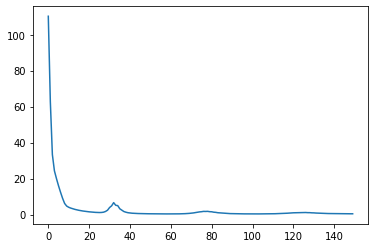

In [7]:
plt.plot(training_history.history['loss'])

In [8]:
x_eval = np.linspace(-1, 1 ,100)
y_eval = 5 * x_eval **3 + 2 * x_eval **2 + 6 * x_eval + 8 

In [9]:
y_pred = model.predict(x_eval)

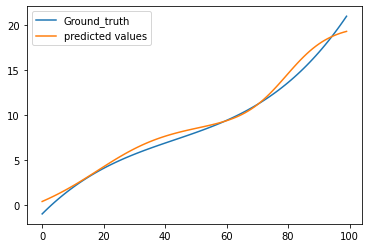

In [10]:
plt.plot(y_eval  )
plt.plot(y_pred )
plt.legend(['Ground_truth' , 'predicted values'] , loc = 'best')

# ***Problem Hypothisis***

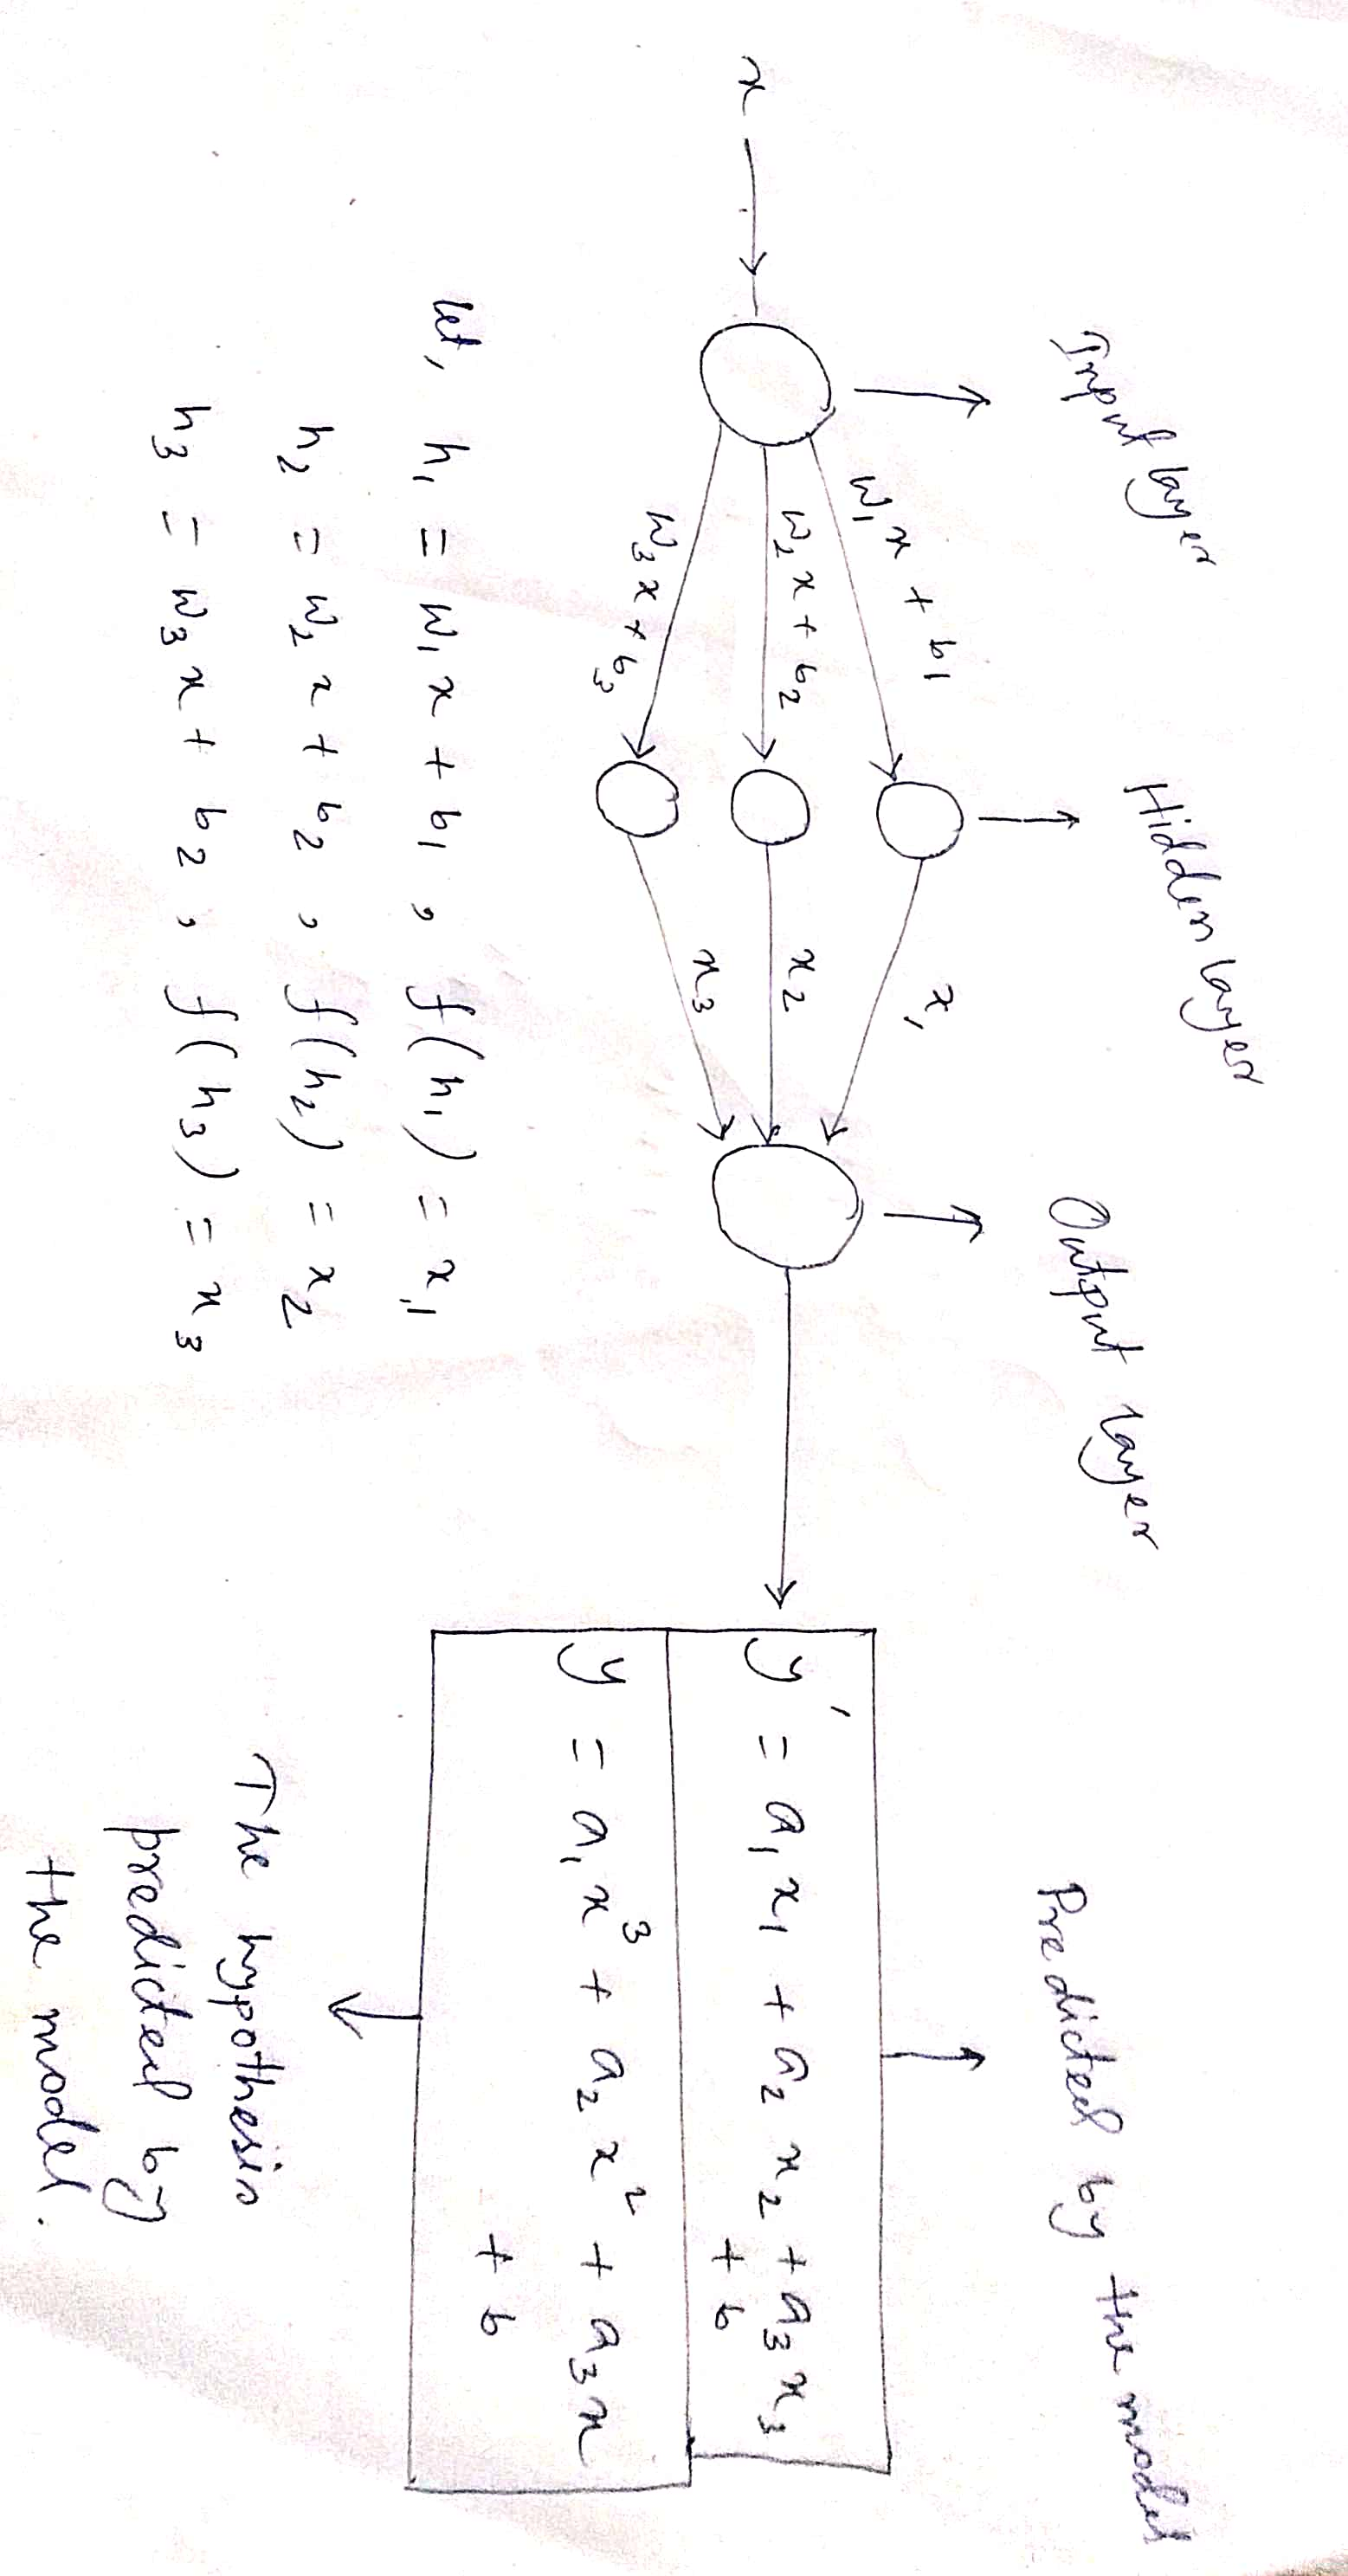

In [12]:
k=0
print('HIDDEN LAYER :')
for i in range(0,3):
  weights = model.layers[0].get_weights()[0][0][i]
  bias = model.layers[0].get_weights()[1][i]
  print('weight:')
  print(weights)
  print('corrosponding bias:')
  print(bias)


HIDDEN LAYER :
weight:
-3.4763281
corrosponding bias:
2.1096876
weight:
2.2159238
corrosponding bias:
1.3440017
weight:
-1.1104404
corrosponding bias:
-1.9317174


In [14]:
a_1 = model.layers[1].get_weights()[0][0][0]
a_2 = model.layers[1].get_weights()[0][1][0]
a_3 = model.layers[1].get_weights()[0][2][0]
b =  model.layers[1].get_weights()[1][0]
print('OUTPUT LAYER')
print('final weights')
print(a_1,a_2,a_3)
print('final bias')
print(b)

OUTPUT LAYER
final weights
-5.4809937 4.265512 -4.3275695
final bias
5.9359493
